In [44]:
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

# <u>Description of Dataset</u>

### GTZAN genre collection dataset is used in this project for genre classification 
Available at: https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification

The dataset consists of 10 different music genres:
 - Blues 
 - Classical
 - Country
 - Disco
 - Hiphop
 - Jazz
 - Metal
 - Pop
 - Reggae
 - Rock <br>
 
Each genre has ***100 different '.au' files*** each having ***30 second music recordings***

Therefore, ***Total songs = 1000***


# <u>Visualizing the Data</u>

In [2]:
#Loading an audio file from dataset
audio_path = 'genres/hiphop/hiphop.00002.au'
x, sr = librosa.load(audio_path) # 'x' contains the audio array and 'sr' has the sample rate          


In [3]:
print('Audio array = ', x) # Gives the number of samples recorded per channel 
print('Sample Rate = ', sr) # These are the number of samples recoded per second

Audio array =  [-0.03308105 -0.04275513 -0.04620361 ...  0.11807251  0.11425781
  0.11431885]
Sample Rate =  22050


In [4]:
print(x.shape) # 661504 samples recored on one channel (mono) over the whole audio

(661504,)


In [5]:
# We can get the approximate length of each audio file by: 
print(x.shape[0]//sr, 'secs')

30 secs


In [6]:
# Playing the audio file
import IPython.display as ipd
ipd.Audio(x, rate = sr)

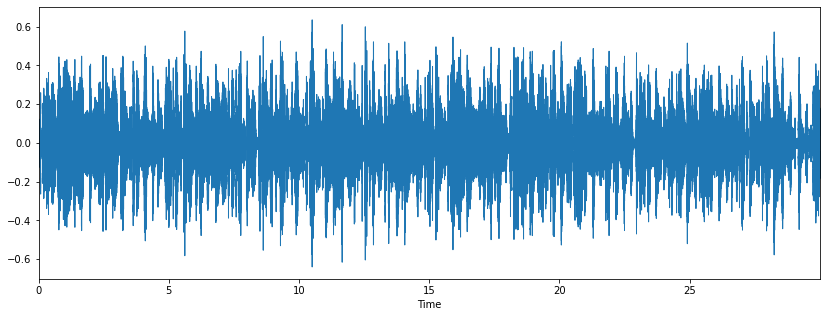

In [7]:
# Displaying the waveform (Amplitude vs Time)
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
# Note: Sound is a longitudinal wave travelling in the form of pressure variances i.e. compressions and rarefactions, through the medium.
#       The waveform shows positive amplitude values which correspond to compression (High pressure relative to ambient pressure)
#       while negative amplitude values which correspond to rarefaction (Low pressure relative to ambient pressure)

e:\7th sem project\venv_trial\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
e:\7th sem project\venv_trial\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
e:\7th sem project\venv_trial\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


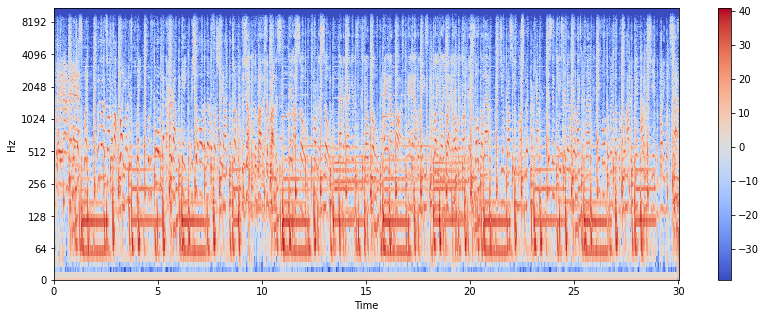

In [8]:
# Displaying the spectrogram (Frequency vs Time)
X = librosa.stft(x) # Short time fourier transform for frequency domain analysis
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log') 
plt.colorbar()

# Note: STFT converts the audio signal such that we know the amplitude of frequency at a given time.
#       The amplitude (or energy or “loudness”) of a particular frequency at a particular time is represented by the third 
#       dimension, color, with dark blues corresponding to low amplitudes and brighter colors up through red corresponding to 
#       progressively stronger (or louder) amplitudes.

# <u>Feature Extraction</u>

### Five important features for audio analysis in general are:
 - ***Time Domain Feature:***
     - Zero-crossing rate
 - ***Spectral (Frequency Domain) Features:***
     - Spectral Centroid
     - Spectral roll-off
     - Chroma Frequencies
     - Mel-Frequency Cepstral Coefficients (MFCC)

### 1.  Zero-Crossing Rate

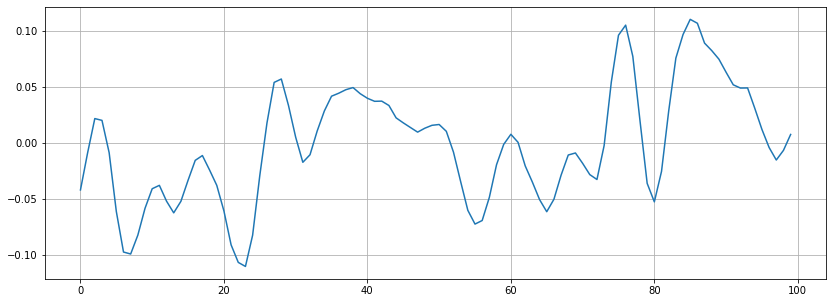

In [9]:
# Zooming in onto 100 samples
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

#### -  Zero-crossing rate gives us the rate at which the signal changes from positive to negative or back
#### -  In the fig above we can see that the waveform crosses zero 13 times 
#### -  Highly percussive sound has high zero-crossing rate 

In [10]:
# We can calculate accurate value of zero-crossing rate through a librosa inbuilt function:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

13


### 2. Spectral Centroid

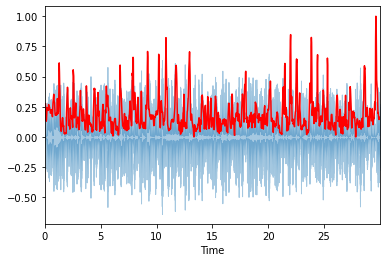

In [11]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

### 3. Spectral Roll-off

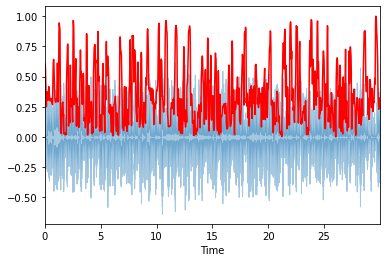

In [12]:
spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

### 4. Chroma Frequencies

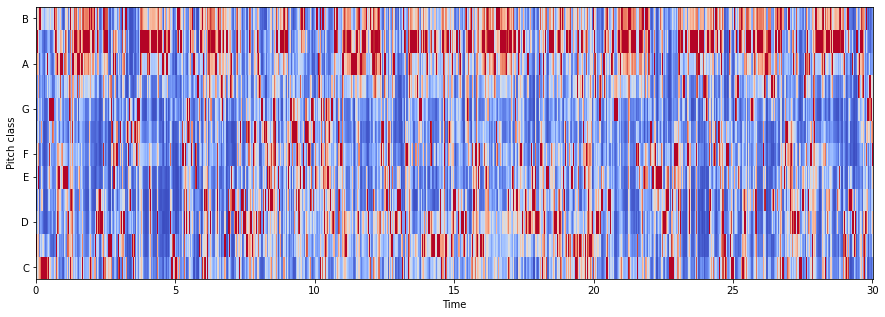

In [13]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

### 5. MFCCs

(20, 1293)


e:\7th sem project\venv_trial\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
e:\7th sem project\venv_trial\lib\site-packages\sklearn\preprocessing\_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


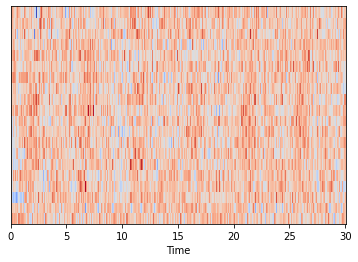

In [14]:
mfccs = librosa.feature.mfcc(x, sr=sr)
mfccs = sklearn.preprocessing.scale(mfccs, axis=1) # rescaling values for mean=0 and variance=1
print(mfccs.shape) # This shows that 20 mfccs are computed over 1293 frames
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

## <font color='maroon'>This concludes data visualization and feature extraction.</font>

## <font color='maroon'>The subsequent part of the notebook contains model building for classification task.</font> 

In this project <u>three</u> different models would be built:
 - An <b>ANN</b> with features extracted in a .csv file
 - A <b>CNN</b> trained on waveplot images of audio signals
 - A <b>CNN</b> trained on spectrogram images of audio signals

Upon training of these models, accuracies for each model would be compared with each other to determine the best model (out of these) for this classification task.

## <u>ANN MODEL BUILDING</u>

### Extracting feature data to .csv file

In [16]:
header = 'filename chroma_stft spectral_centroid spectral_rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [19]:
# This cell includes the code to store the five feature values (seen above) for the entire dataset into a .csv file
'''
import csv
import os
file = open('extracted_data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    for filename in os.listdir(f'genres/{g}'):
        songname = f'genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)        
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(spec_cent)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('extracted_data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())
'''

"\nimport csv\nimport os\nfile = open('extracted_data.csv', 'w', newline='')\nwith file:\n    writer = csv.writer(file)\n    writer.writerow(header)\ngenres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()\nfor g in genres:\n    for filename in os.listdir(f'genres/{g}'):\n        songname = f'genres/{g}/{filename}'\n        y, sr = librosa.load(songname, mono=True, duration=30)\n        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)\n        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)        \n        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)\n        zcr = librosa.feature.zero_crossing_rate(y)\n        mfcc = librosa.feature.mfcc(y=y, sr=sr)\n        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(spec_cent)} {np.mean(rolloff)} {np.mean(zcr)}'    \n        for e in mfcc:\n            to_append += f' {np.mean(e)}'\n        to_append += f' {g}'\n        file = open('extracted_data.csv', 'a', newline='')\n        with 

In [15]:
csv_data = pd.read_csv('extracted_data.csv') # .csv file containing all feature values
csv_data.head() # prints out the first five rows of the entire .csv file

,filename,chroma_stft,spectral_centroid,spectral_rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.au,0.349943,1784.420446,3806.485316,0.083066,-113.596748,121.557297,-19.158825,42.351032,-6.376458,...,8.810669,-3.667368,5.751691,-5.162763,0.750948,-1.691938,-0.409953,-2.300209,1.219929,blues
1,blues.00001.au,0.340983,1529.835316,3548.820207,0.056044,-207.556793,124.006721,8.930560,35.874687,2.916037,...,5.376803,-2.239120,4.216963,-6.012273,0.936109,-0.716537,0.293876,-0.287431,0.531573,blues
2,blues.00002.au,0.363603,1552.481958,3040.514948,0.076301,-90.754387,140.459900,-29.109968,31.689013,-13.987036,...,5.789265,-8.905224,-1.083720,-9.218359,2.455806,-7.726901,-1.815723,-3.433434,-2.226821,blues
3,blues.00003.au,0.404779,1070.119953,2185.028454,0.033309,-199.431152,150.099213,5.647593,26.871927,1.754461,...,6.087676,-2.476421,-1.073890,-2.874778,0.780977,-3.316932,0.637982,-0.619690,-3.408233,blues
4,blues.00004.au,0.308590,1835.494603,3580.945013,0.101500,-160.266037,126.198807,-35.605450,22.153301,-32.489269,...,-2.806383,-6.934123,-7.558618,-9.173553,-4.512165,-5.453538,-0.924161,-4.409333,-11.703781,blues


In [16]:
csv_data.shape # 1000 rows (each row for each song) and 26 columns

(1000, 26)

In [17]:
# Dropping 'filename' column which is not necessary for training
csv_data = csv_data.drop(['filename'], axis = 1)

In [19]:
csv_data.head() # Dropped the 'filename' column

,chroma_stft,spectral_centroid,spectral_rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.349943,1784.420446,3806.485316,0.083066,-113.596748,121.557297,-19.158825,42.351032,-6.376458,18.618876,...,8.810669,-3.667368,5.751691,-5.162763,0.750948,-1.691938,-0.409953,-2.300209,1.219929,blues
1,0.340983,1529.835316,3548.820207,0.056044,-207.556793,124.006721,8.930560,35.874687,2.916037,21.523726,...,5.376803,-2.239120,4.216963,-6.012273,0.936109,-0.716537,0.293876,-0.287431,0.531573,blues
2,0.363603,1552.481958,3040.514948,0.076301,-90.754387,140.459900,-29.109968,31.689013,-13.987036,25.754763,...,5.789265,-8.905224,-1.083720,-9.218359,2.455806,-7.726901,-1.815723,-3.433434,-2.226821,blues
3,0.404779,1070.119953,2185.028454,0.033309,-199.431152,150.099213,5.647593,26.871927,1.754461,14.238345,...,6.087676,-2.476421,-1.073890,-2.874778,0.780977,-3.316932,0.637982,-0.619690,-3.408233,blues
4,0.308590,1835.494603,3580.945013,0.101500,-160.266037,126.198807,-35.605450,22.153301,-32.489269,10.864513,...,-2.806383,-6.934123,-7.558618,-9.173553,-4.512165,-5.453538,-0.924161,-4.409333,-11.703781,blues


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [33]:
# Generating class labels
labels = csv_data.iloc[:,-1]
encode = LabelEncoder()
y = encode.fit_transform(labels)

Encoding genre names into numbers for training:
 - Blues => 0
 - Classical => 1
 - Country => 2
 - Disco => 3
 - Hiphop => 4
 - Jazz => 5
 - Metal => 6
 - Pop => 7
 - Reggae => 8
 - Rock => 9<br>

In [37]:
# Z-score Normalization (mean = 0, var = 1)
scaler = StandardScaler()
X = scaler.fit_transform(np.array(csv_data.iloc[:, :-1], dtype = float))

### Creating Training and Testing Sets

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) # 80% data for training and 20% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(800, 24)
(800,)
(200, 24)
(200,)


### Creating the Model

In [119]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(256, activation = 'relu', input_shape=(X_train.shape[1],)),                                     
                                    tf.keras.layers.Dense(128, activation = 'relu'),                                    
                                    tf.keras.layers.Dense(64, activation = 'relu'),                                    
                                    tf.keras.layers.Dense(32, activation = 'relu'),
                                    tf.keras.layers.Dense(10, activation = 'softmax')])                    

In [120]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [121]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=100)

Epoch 1/20
8/8 [==============================] - 0s 2ms/step - loss: 2.1952 - accuracy: 0.1538
Epoch 2/20
8/8 [==============================] - 0s 3ms/step - loss: 1.9671 - accuracy: 0.3750
Epoch 3/20
8/8 [==============================] - 0s 3ms/step - loss: 1.7521 - accuracy: 0.4137
Epoch 4/20
8/8 [==============================] - 0s 4ms/step - loss: 1.5608 - accuracy: 0.4737
Epoch 5/20
8/8 [==============================] - 0s 3ms/step - loss: 1.3814 - accuracy: 0.5138
Epoch 6/20
8/8 [==============================] - 0s 3ms/step - loss: 1.2417 - accuracy: 0.5863
Epoch 7/20
8/8 [==============================] - 0s 3ms/step - loss: 1.1264 - accuracy: 0.6225
Epoch 8/20
8/8 [==============================] - 0s 3ms/step - loss: 1.0295 - accuracy: 0.6625
Epoch 9/20
8/8 [==============================] - 0s 3ms/step - loss: 0.9507 - accuracy: 0.6988
Epoch 10/20
8/8 [==============================] - 0s 2ms/step - loss: 0.9072 - accuracy: 0.6750
Epoch 11/20
8/8 [======================

In [122]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 1.0753 - accuracy: 0.6500


[1.0752589702606201, 0.6499999761581421]